In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotels = pd.read_excel("./assignments/data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

<AxesSubplot:xlabel='date', ylabel='LodgingRevenue'>

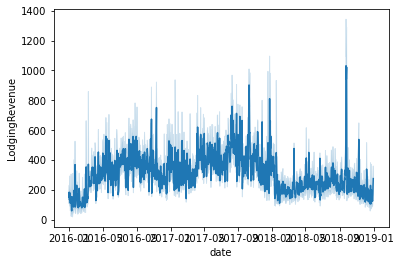

In [3]:
sns.lineplot(
    x='date',
    y='LodgingRevenue',
    data=hotels
)

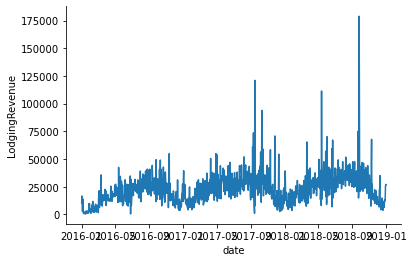

In [10]:
sns.lineplot(
    x='date',
    y='LodgingRevenue',
    data=hotels,
    ci=None
    ,estimator=sum
)

sns.despine()

In [11]:
housing_raw = pd.read_csv(
    'assignments/data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [27]:
ca_housing = (housing_raw.loc[
        (housing_raw['region_name'].str.contains('CA'))
    ].assign(region_name = housing_raw['region_name'].str[0:-11])
#      .set_index('period_begin').sort_index()
)
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [28]:
# del ca_inventory_pivot
ca_price_pivot = ca_housing.pivot_table(
    index = 'period_begin',
    columns = 'region_name',
    values = 'median_active_list_price',
    aggfunc=np.mean
).assign(
    overall_avg = lambda x: x.mean(axis=1)
).loc[:, ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare', 'overall_avg']]

ca_price_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,227729.1,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,229060.4,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,229806.2,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,230139.5,499286.207547


<AxesSubplot:xlabel='period_begin', ylabel='overall_avg'>

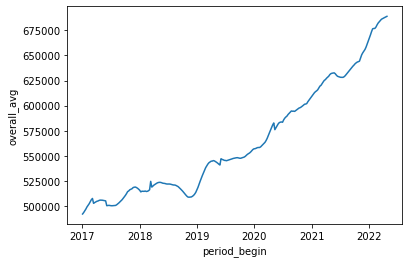

In [29]:
sns.lineplot(
    x='period_begin',
    y='overall_avg',
    data=ca_price_pivot
)

<AxesSubplot:xlabel='period_begin', ylabel='median_active_list_price'>

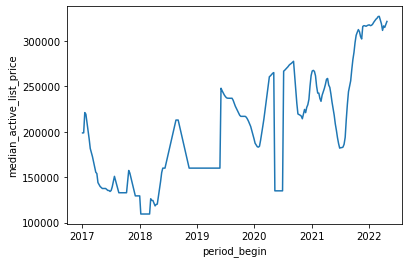

In [37]:
sns.lineplot(
    x='period_begin',
    y='median_active_list_price',
    data=ca_housing,
#     hue='region_name',
    ci=None,
    estimator='min'
)

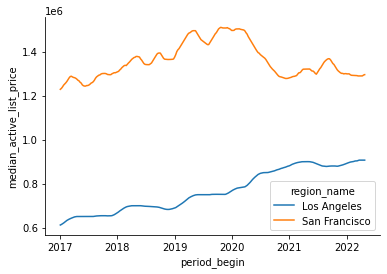

In [40]:
sns.lineplot(
    x='period_begin',
    y='median_active_list_price',
    data=ca_housing.query("region_name in ['San Francisco', 'Los Angeles']"),
    hue='region_name',
    ci=None,
#     estimator='min'
)

sns.despine()

In [42]:
diamonds = pd.read_csv('./assignments/data/Diamonds Prices2022.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='cut', ylabel='carat'>

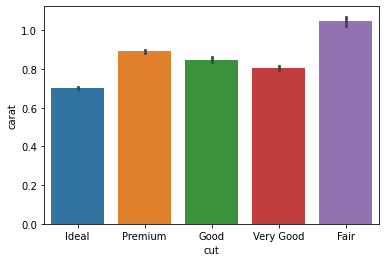

In [45]:
sns.barplot(
    data=diamonds,
    x='cut',
    y='carat',
#     ci=None
)

<AxesSubplot:xlabel='carat', ylabel='cut'>

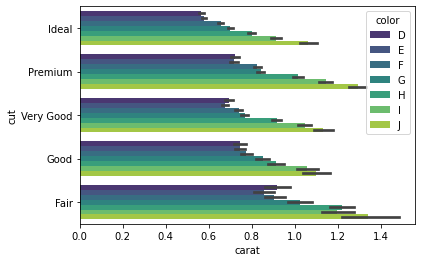

In [50]:
sns.barplot(
    data=diamonds.sort_values(by='color'),
    y='cut',
    x='carat',
    hue='color',
    palette='viridis'
#     ci=None
)

<AxesSubplot:xlabel='price', ylabel='Count'>

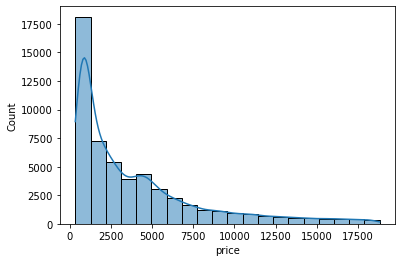

In [56]:
sns.histplot(data=diamonds, x='price', kde=True, bins=20)

<AxesSubplot:xlabel='price', ylabel='Count'>

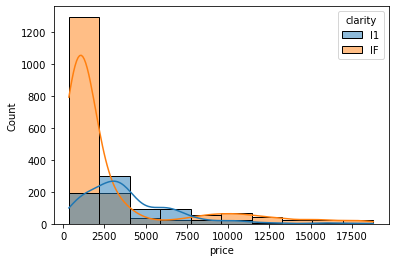

In [58]:
sns.histplot(data=diamonds.query("clarity in ['I1', 'IF']"), x='price', hue='clarity', kde=True, bins=10)

<AxesSubplot:xlabel='price', ylabel='clarity'>

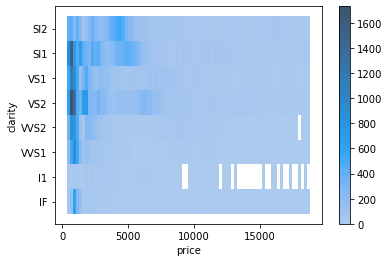

In [63]:
sns.histplot(data=diamonds,
            x='price',
            y='clarity',
             cbar=True,
#              kde=True
            )

In [98]:
data_staffs = pd.read_csv('/Users/dungminhdang/OneDrive - Hitachi Vantara/HV-Personal/Data Science CoE/CoE staffs - FY2023.csv', sep=';')
data_staffs.head()

,LDAP,HCC ID,Employee Name,Level,Email,BU,Location,Subteam,Current Project
0,71391355.0,128958.0,Bui Thi Thuy Quynh,SC2,quynh.bui@hitachivantara.com,IoM i4.0,(HV) VN Ho Chi Minh City,DE,Hitachi Rail Limited-HFMT WCP Platform_V_7
1,71705692.0,143116.0,Dang Minh Dung,SMCS1,dung.dang@hitachivantara.com,IoM i4.0,(HV) VN Hanoi,DS,American Honda Motor Co Inc-Data Science service
2,71705782.0,143649.0,Phan Thi Thiet Linh,MCS1,linh.phan@hitachivantara.com,IoM i4.0,(HV) VN Ho Chi Minh City,DS,"Mitsui Fudosan Co,Ltd-Hotel Data Visualization..."
3,71705704.0,142877.0,Le Ngo Khanh Linh,C1,linh.le3@hitachivantara.com,DS DM App Engineering,(HV) VN Ho Chi Minh City,DE,HIOaaS Development
4,71843147.0,147034.0,Phan Nhat Thanh,SC2,thanh.phan@hitachivantara.com,IoM i4.0,(HV) VN Ho Chi Minh City,DA,"Mitsui Fudosan Co,Ltd-Hotel Data Visualization..."


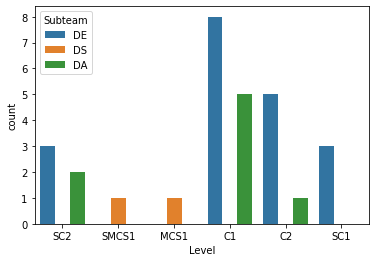

In [107]:
sns.countplot(data=data_staffs, x='Level', hue='Subteam')
plt.show()

In [100]:
data_by_location = data_staffs.groupby('Location').agg({'Email': 'count'})
data_by_location

,Email
Location,
(HV) VN Danang City,3
(HV) VN Hanoi,5
(HV) VN Ho Chi Minh City,21


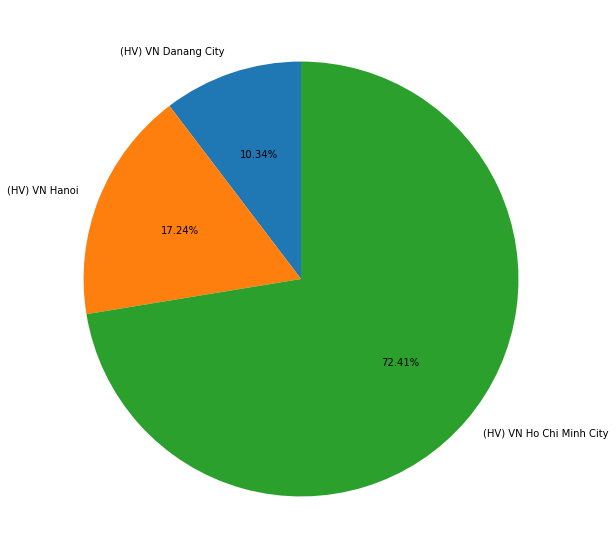

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(data_by_location['Email'],
       labels=data_by_location.index,
       startangle=90,
      autopct='%.2f%%')

plt.show()

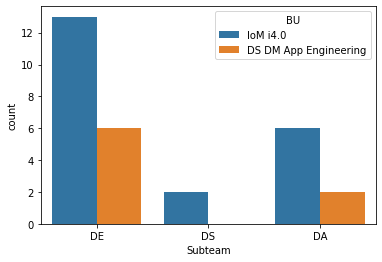

In [105]:
sns.countplot(data=data_staffs, x='Subteam', hue='BU')
plt.show()

<AxesSubplot:xlabel='x', ylabel='price'>

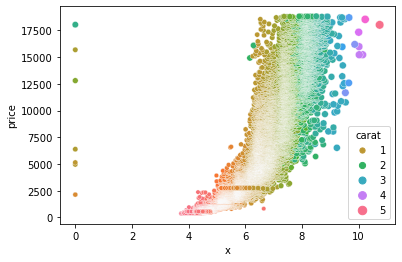

In [110]:
sns.scatterplot(data=diamonds,
               x='x',
               y='price',
               hue='carat',
               size='carat',
               palette='husl')

<AxesSubplot:xlabel='price'>

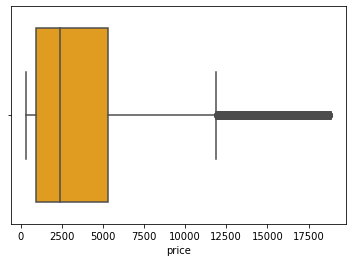

In [112]:
sns.boxplot(data=diamonds,
           x='price',
           color='orange')

<AxesSubplot:xlabel='cut', ylabel='price'>

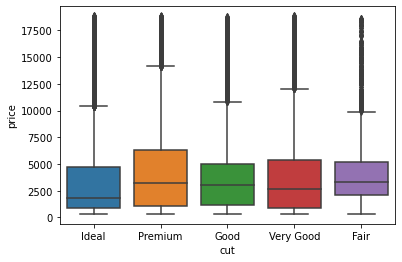

In [113]:
sns.boxplot(data=diamonds,
           x='cut', y='price')

<AxesSubplot:xlabel='cut', ylabel='price'>

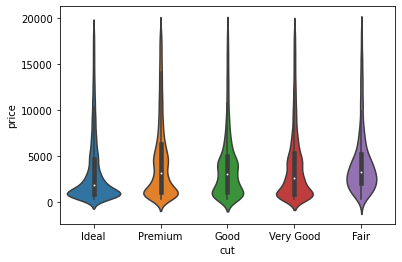

In [114]:
sns.violinplot(data=diamonds,
              x='cut', y='price')

<AxesSubplot:xlabel='carat', ylabel='price'>

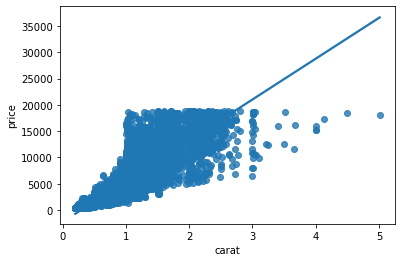

In [115]:
sns.regplot(data=diamonds, x='carat', y='price')

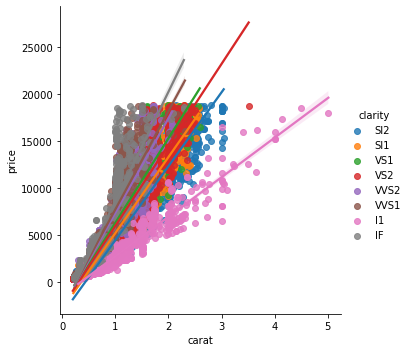

In [119]:
sns.lmplot(data=diamonds, x='carat', y='price', hue='clarity')

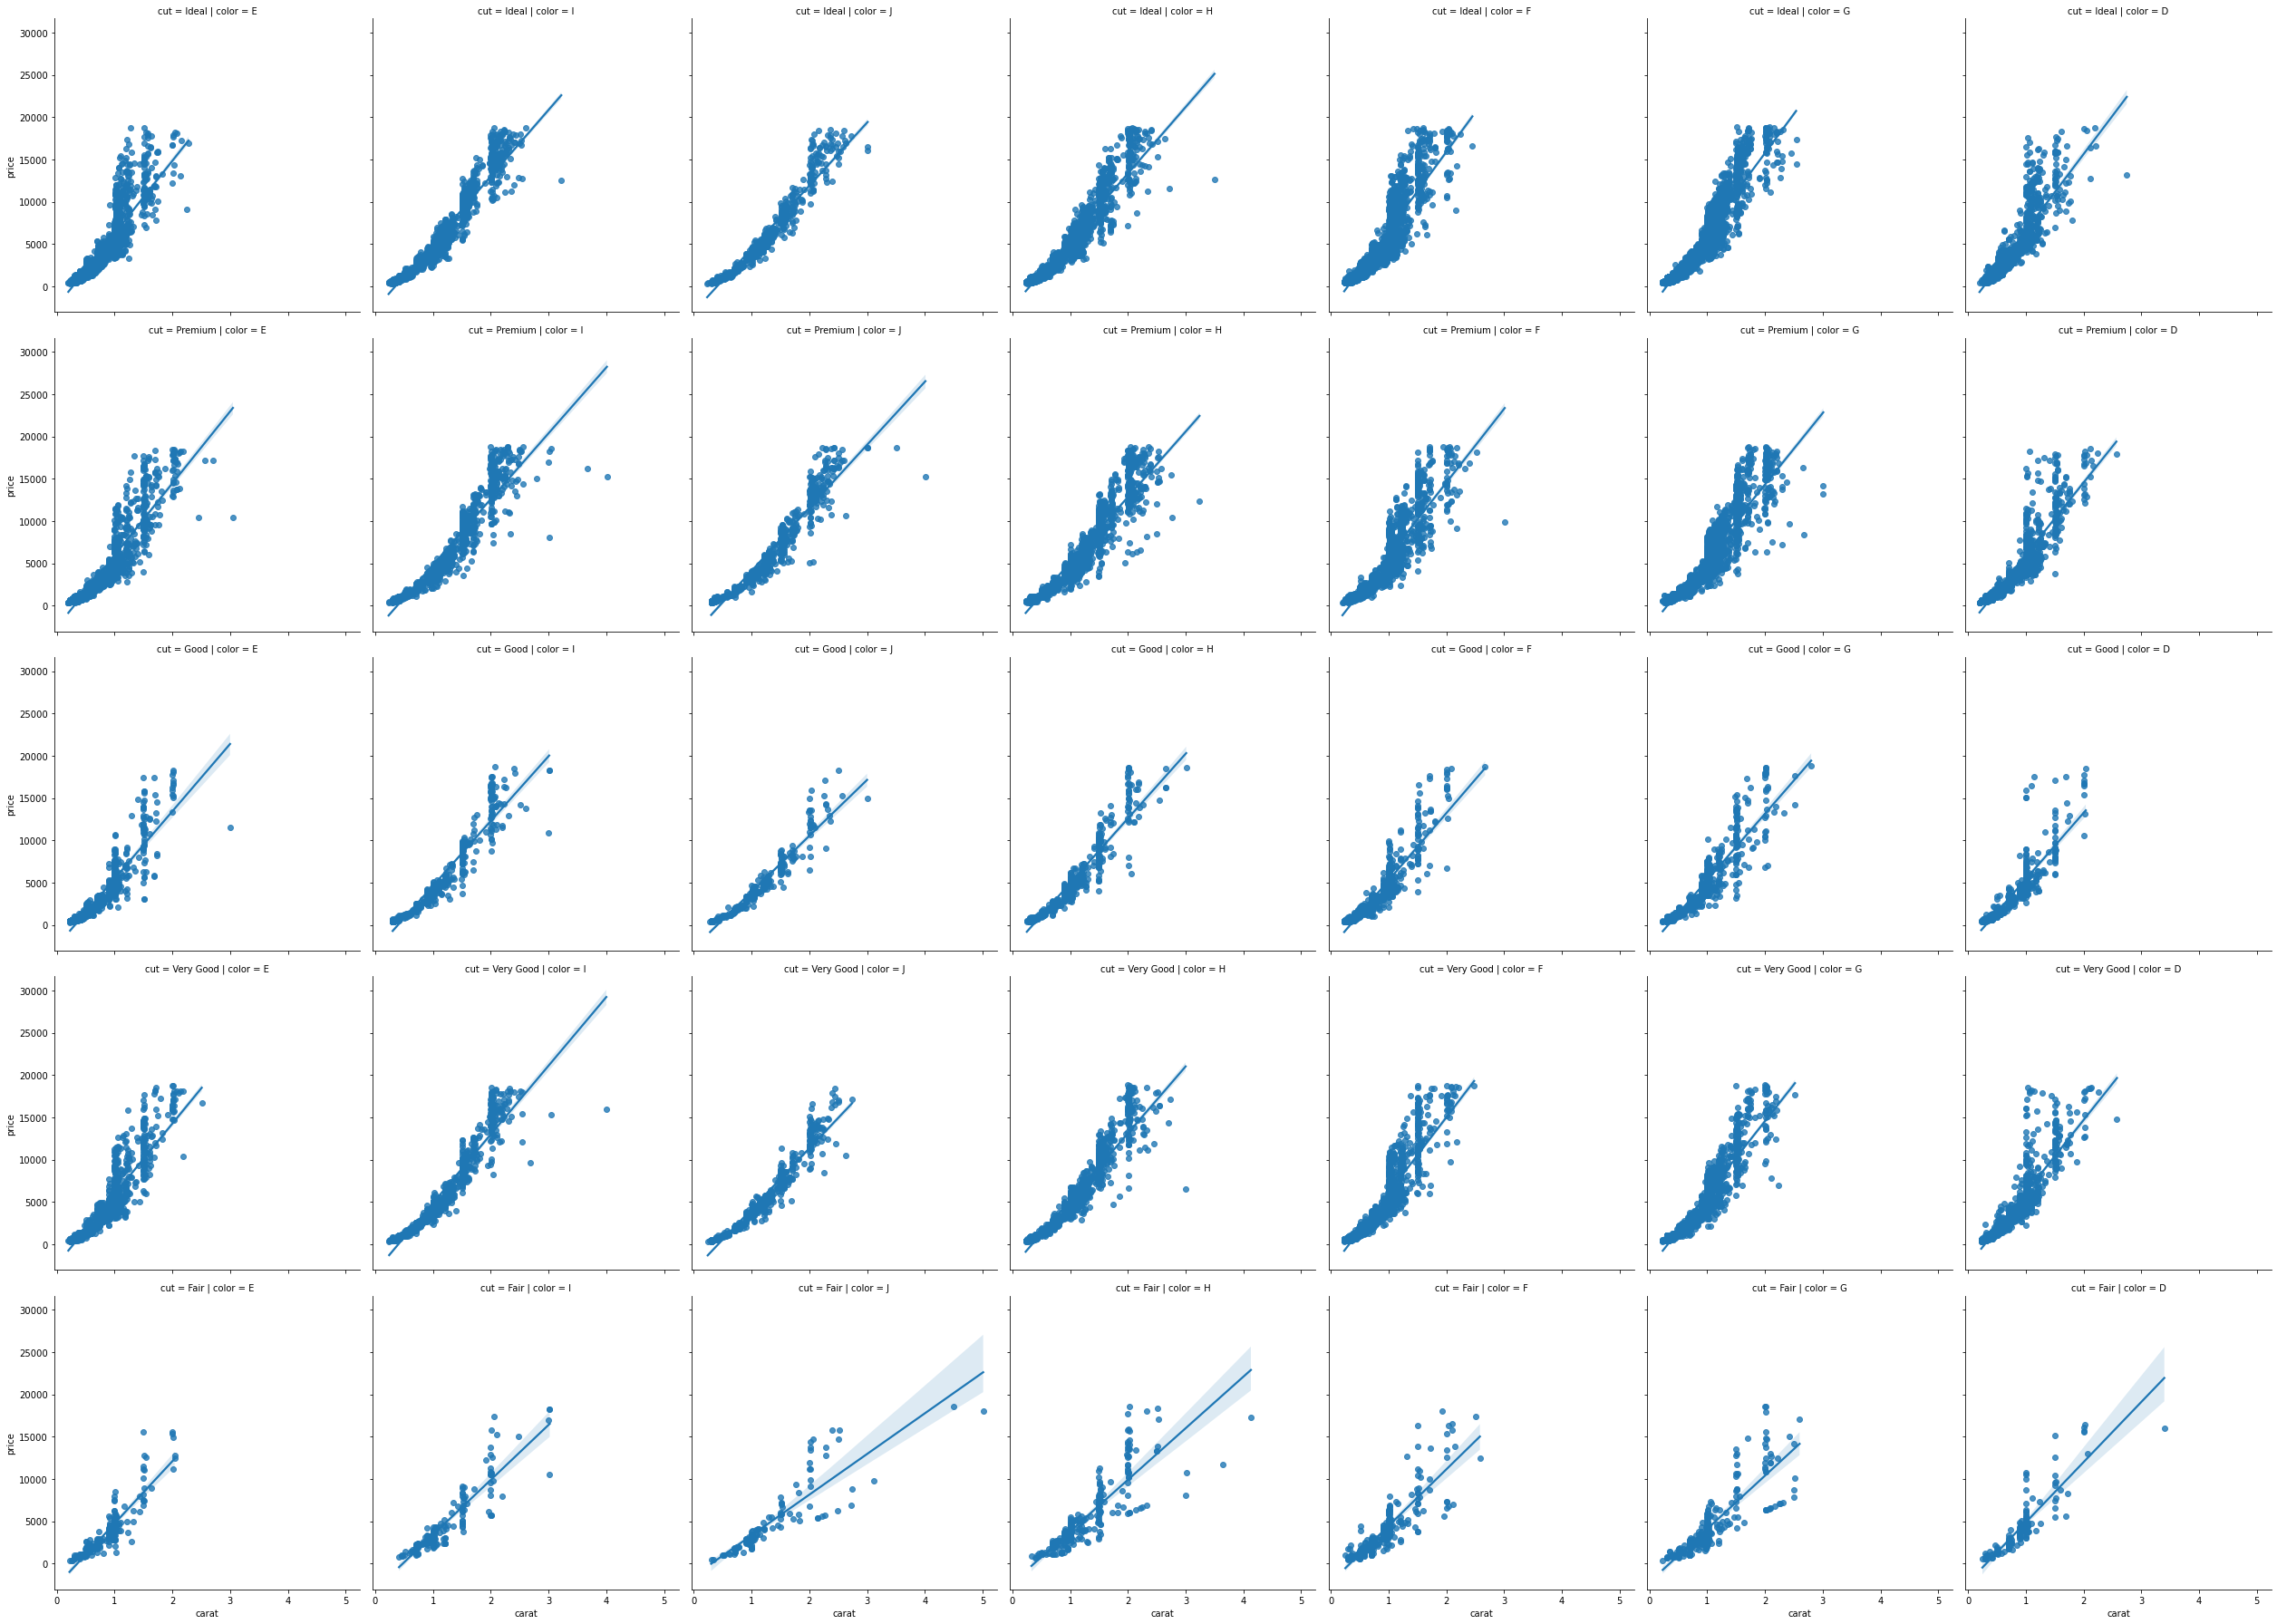

In [121]:
sns.lmplot(data=diamonds, x='carat', y='price', row='cut', col='color')

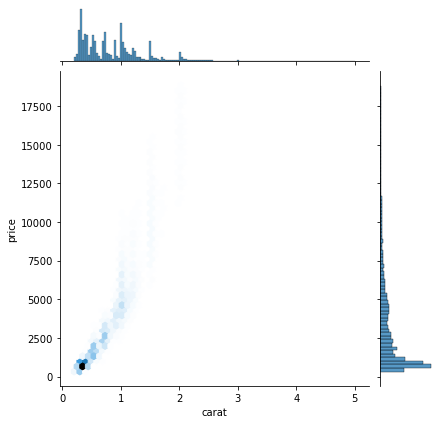

In [131]:
sns.jointplot(data=diamonds, x='carat', y='price',
#               kind='reg',
#               scatter_kws={'alpha': .1}
              kind='hex'
             )

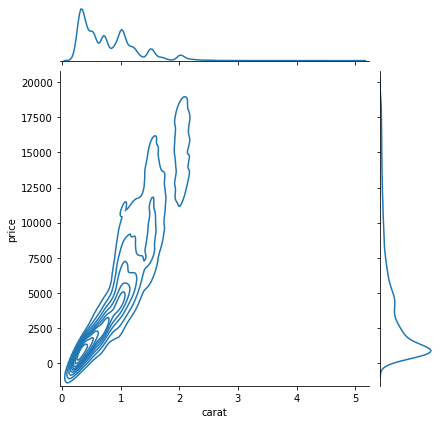

In [124]:
sns.jointplot(data=diamonds, x='carat', y='price', kind='kde')

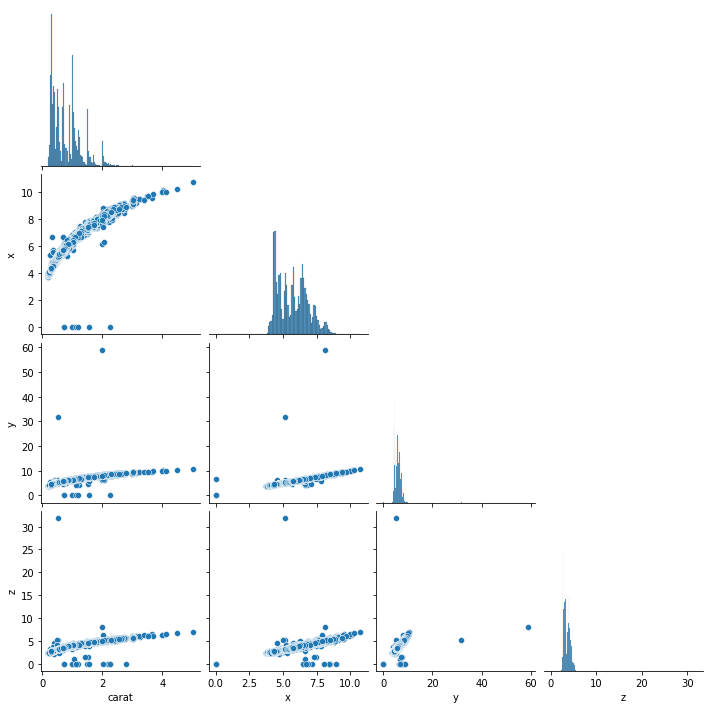

In [133]:
sns.pairplot(diamonds.loc[:, ['carat', 'x', 'y', 'z']], corner=True)

In [134]:
diamond_pivot = diamonds.pivot_table(
    index='cut',
    columns='color',
    values={'carat': 'mean'}
)

diamond_pivot

carat                                                    \
color             D         E         F         G         H         I   
cut                                                                     
Fair       0.920123  0.856607  0.904712  1.023822  1.219175  1.198057   
Good       0.744517  0.745134  0.775930  0.850896  0.914729  1.057222   
Ideal      0.565766  0.578401  0.655829  0.700715  0.799525  0.913029   
Premium    0.721547  0.717742  0.826985  0.841488  1.016449  1.144937   
Very Good  0.696424  0.676327  0.740961  0.766799  0.915948  1.046952   

                     
color             J  
cut                  
Fair       1.341176  
Good       1.099544  
Ideal      1.063594  
Premium    1.293094  
Very Good  1.133215

<AxesSubplot:xlabel='color', ylabel='cut'>

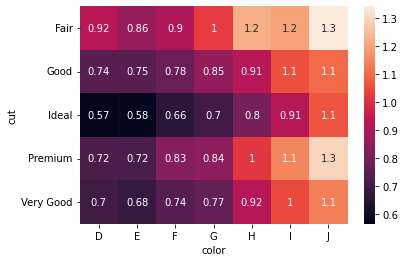

In [147]:
sns.heatmap(data=diamond_pivot.droplevel(0, axis=1), annot=True)

<AxesSubplot:>

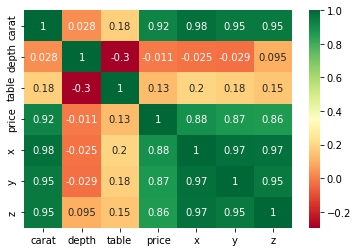

In [146]:
sns.heatmap(diamonds.iloc[:, 1:].corr(), annot=True, cmap='RdYlGn')

In [149]:
housing_raw = pd.read_csv(
    'assignments/data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)


In [151]:
bins = np.linspace(0, 1750000, 8)
bins

array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
       1500000., 1750000.])

In [152]:
labels = ['0-250k', '250k-500k', '500k-750k', '750k-1m', '1m-1.25m', '1.25m-1.5m', '1.5m+']

In [154]:
ca_housing = (housing_raw.loc[
                (housing_raw['region_name'].str.contains('CA'))
                ]
              .assign(
                region_name = housing_raw['region_name'].str[0:-11],
                price_bin=pd.cut(housing_raw['median_active_list_price'],
                                bins=bins,
                                labels=labels)
              ))
              
ca_housing

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bin
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,250k-500k
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607,500k-750k
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632,250k-500k
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228,250k-500k
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362,250k-500k
...,...,...,...,...,...,...,...,...,...,...
622099,Merced,2018-01-08,2018-04-01,535,552.0,612.0,55.6,291834.9,14.373568,250k-500k
622118,Lassen,2017-05-01,2017-07-23,1,4.0,4.0,121.1,138666.6,5.000000,0-250k
622159,Los Angeles,2021-06-28,2021-09-19,19525,14252.0,16098.0,35.5,888483.3,10.008760,750k-1m
622195,Imperial,2017-01-02,2017-03-26,<NA>,1.0,1.0,113.5,344900.0,NaN,250k-500k


In [155]:
region_list = ['Los Angeles', 'San Diego', 'San Francisco', 'Tulare']

region_housing = ca_housing.loc[ca_housing['region_name'].isin(region_list)]
region_housing

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bin
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k
...,...,...,...,...,...,...,...,...,...,...
618814,San Diego,2020-02-24,2020-05-17,7060,5380.0,6044.0,44.1,708557.9,10.753561,500k-750k
620240,San Diego,2018-04-30,2018-07-22,9509,7285.0,8141.0,41.0,676754.0,10.379958,500k-750k
620709,San Francisco,2019-09-16,2019-12-08,1308,1084.0,1229.0,38.2,1481588.5,11.611986,1.25m-1.5m
620939,Tulare,2018-09-03,2018-11-25,18,51.0,53.0,84.9,324362.5,38.126984,250k-500k


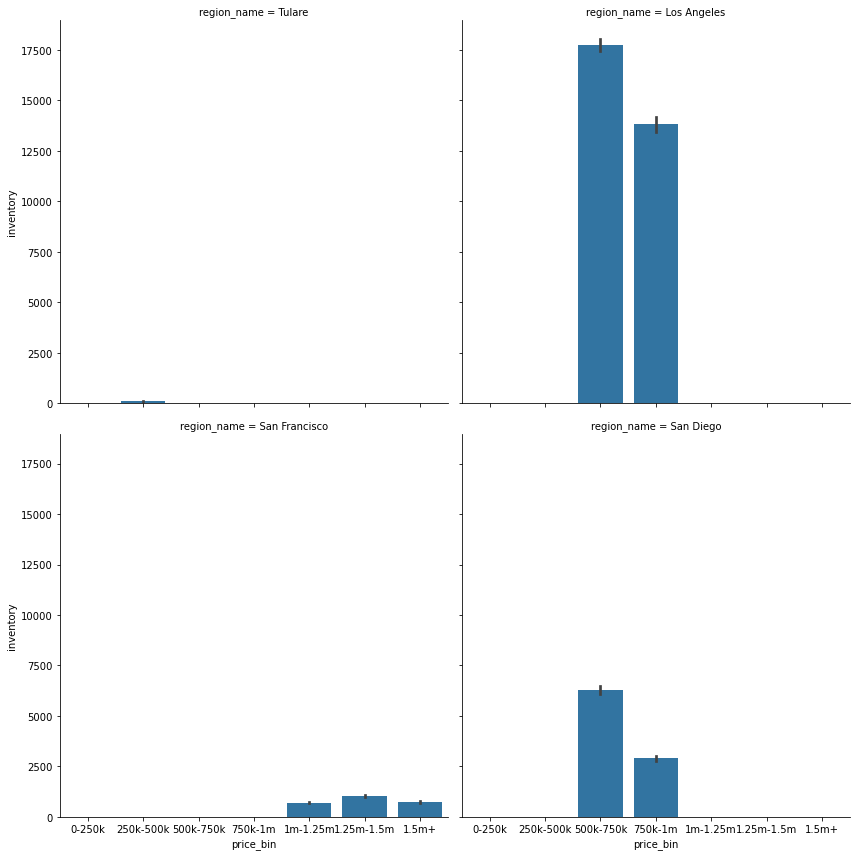

In [161]:
g = sns.FacetGrid(region_housing, col='region_name', col_wrap=2,
                height=6)
g.map_dataframe(sns.barplot,
                x='price_bin', y='inventory'
               )